In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
print(df.loc[0,:])

SEVERITYCODE                                                      2
X                                                          -122.323
Y                                                           47.7031
OBJECTID                                                          1
INCKEY                                                         1307
COLDETKEY                                                      1307
REPORTNO                                                    3502005
STATUS                                                      Matched
ADDRTYPE                                               Intersection
INTKEY                                                        37475
LOCATION                                 5TH AVE NE AND NE 103RD ST
EXCEPTRSNCODE                                                      
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    2
SEVERITYDESC                                    

In [5]:
print(df.isnull().sum(axis=0))

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


In [6]:
print("Give a run_down of the values present in the table for SEVERITYCODE")
print(df["SEVERITYDESC"].value_counts())

Give a run_down of the values present in the table for SEVERITYCODE
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


In [7]:
todrop = df["SEVERITYDESC"] == 'Unknown'
print("\n Preparing to drop "+str(todrop.values.sum())+" rows.")
df.drop(df.index[todrop], inplace=True)
print("Done!")

df.reset_index(inplace=True)


 Preparing to drop 0 rows.
Done!


In [8]:
if 'OBJECTID' in df:
    del df["OBJECTID"]
if 'COLDETKEY' in df:
    del df["COLDETKEY"]
if 'REPORTNO' in df:
    del df["REPORTNO"]
if 'STATUS' in df:
    del df["STATUS"]
if 'EXCEPTRSNCODE' in df:
    del df["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in df:
    del df["EXCEPTRSNDESC"]
if 'INCDATE' in df:
    del df["INCDATE"]
if 'SDOTCOLNUM' in df:
    del df["SDOTCOLNUM"]
if 'STCOLCODE' in df:
    del df["STCOLCODE"]

In [9]:
todrop1 = df["WEATHER"] == 'Unknown'
noweatherinfo = todrop1.values.sum()

In [10]:
todrop2 = df["ROADCOND"] == "Unknown"
noroadcondinfo = todrop2.values.sum()

In [11]:
todrop3 = df["LIGHTCOND"] == "Unknown"
nolightinfo = todrop3.values.sum()

In [12]:
print(df["SEVERITYCODE"].value_counts())

count2b = 0
count3  = 0
for i in range(0,len(df["SEVERITYCODE"])):
    if df["SEVERITYDESC"][i] == 'Serious Injury Collision':
        df["SEVERITYCODE"][i] =3
        count2b += 1
    if df["SEVERITYDESC"][i] =='Fatality collision':
        df["SEVERITYCODE"][i] =4
        count3 += 1
        
df=df.astype({'SEVERITYCODE':np.int})

print("\n Changed "+str(count2b)+" entries from 2b->3 and "+str(count3)+" from 3->4. \n The tables now look like:")
print(df["SEVERITYCODE"].value_counts())
print(df["SEVERITYDESC"].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

 Changed 0 entries from 2b->3 and 0 from 3->4. 
 The tables now look like:
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64


In [13]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [14]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [15]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [18]:
weatherdummies = pd.get_dummies(df["WEATHER"])
lightconddummies = pd.get_dummies(df["LIGHTCOND"])
roadconddummies = pd.get_dummies(df["ROADCOND"])
addrtypedummies = pd.get_dummies(df["ADDRTYPE"])

In [19]:
weatherdummies.rename(columns={"Other": "Other weather"}, inplace=True)
lightconddummies.rename(columns={"Other": "Other light"}, inplace=True)
roadconddummies.rename(columns={"Other": "Other roadcond"}, inplace=True)

In [20]:
colcodedummies = pd.get_dummies(df["SDOT_COLCODE"])
columns = colcodedummies.columns
for col in columns:
    colcodedummies = colcodedummies.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

In [21]:
print(colcodedummies.shape)
colcodedummies.head(5)

(194673, 39)


,SDOT_COLCODE_0,SDOT_COLCODE_11,SDOT_COLCODE_12,SDOT_COLCODE_13,SDOT_COLCODE_14,SDOT_COLCODE_15,SDOT_COLCODE_16,SDOT_COLCODE_18,SDOT_COLCODE_21,SDOT_COLCODE_22,...,SDOT_COLCODE_53,SDOT_COLCODE_54,SDOT_COLCODE_55,SDOT_COLCODE_56,SDOT_COLCODE_58,SDOT_COLCODE_61,SDOT_COLCODE_64,SDOT_COLCODE_66,SDOT_COLCODE_68,SDOT_COLCODE_69
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(df.isnull().sum(axis=0))

index                  0
SEVERITYCODE           0
X                   5334
Y                   5334
INCKEY                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND         0
UNDERINFL              0
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT          0
SPEEDING               0
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


In [23]:
data = df.copy()
if 'INCKEY' in df:
    del data["INCKEY"]
    del data["INTKEY"]
    del data["ADDRTYPE"]
    del data["LOCATION"]
    del data["SEVERITYDESC"]
    del data["COLLISIONTYPE"]
    del data["INCDTTM"]
    del data["JUNCTIONTYPE"]
    del data["SDOT_COLDESC"]

In [24]:
print("The shape of the dataframe is:")
print(data.shape)

The shape of the dataframe is:
(194673, 22)


In [25]:
print("The data types are:")
data.dtypes

The data types are:


index               int64
SEVERITYCODE        int64
X                 float64
Y                 float64
SEVERITYCODE.1      int64
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
SDOT_COLCODE        int64
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT       int64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
dtype: object

In [26]:
print("Here is a count of how many null/NaN values there are in each column:")
print(data.isnull().sum(axis=0))

Here is a count of how many null/NaN values there are in each column:
index                0
SEVERITYCODE         0
X                 5334
Y                 5334
SEVERITYCODE.1       0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
SDOT_COLCODE         0
INATTENTIONIND       0
UNDERINFL            0
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64


In [27]:
!pip install folium
import pandas as pd
import folium

In [28]:
lon_med = data["X"].mean()
lat_med = data["Y"].mean()

print(lat_med)
print(lon_med)

seattle_map = folium.Map(location=[lat_med, lon_med], zoom_start=11)
seattle_map

47.619542517688615
-122.33051843904114


In [29]:
!pip install pyscreenshot
!pip install selenium
import pyscreenshot as ImageGrab
from selenium import webdriver

In [30]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__) 


Matplotlib version:  3.0.2


In [31]:
df.head(5)

,index,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,...,Overcast,Wet,Daylight,0,0,10,Entering at angle,0,0,0
1,1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,...,Raining,Wet,Dark - Street Lights On,0,0,11,From same direction - both going straight - bo...,0,0,0
2,2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,...,Overcast,Dry,Daylight,0,0,32,One parked--one moving,0,0,0
3,3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,...,Clear,Dry,Daylight,0,0,23,From same direction - all others,0,0,0
4,4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,...,Raining,Wet,Daylight,0,0,10,Entering at angle,0,0,0


In [32]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

There are194673entries in df currently.


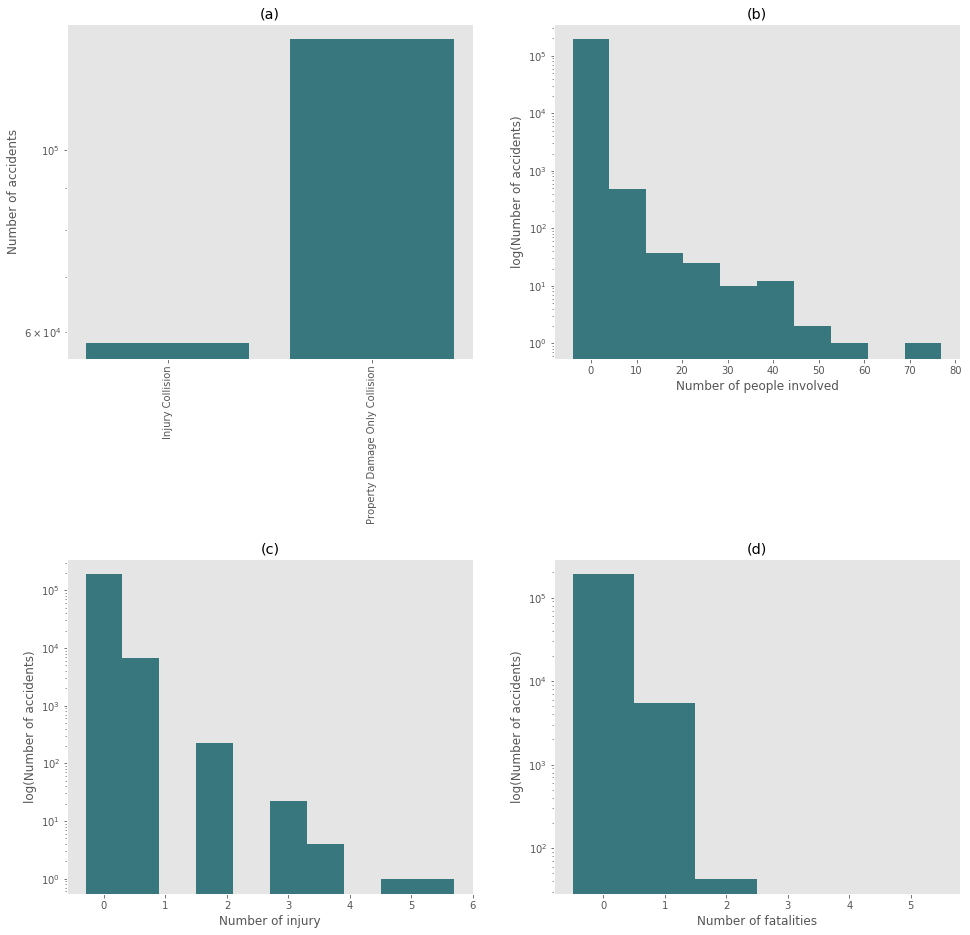

In [33]:
print("There are"+str(len(df))+"entries in df currently.")

plt.rcParams["figure.figsize"]=(16,16)
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')

plt.subplot(2,2,3)
freqs = Counter(df["PEDCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.xlabel("Number of injury")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["PEDCOUNT"], align='left', color='#37777D')
plt.yscale('log')

plt.subplot(2,2,4)
freqs = Counter(df["PEDCYLCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.xlabel("Number of fatalities")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["PEDCYLCOUNT"], bins=[0,1,2,3,4,5,6], align='left', color='#37777D')
plt.yscale('log')

plt.subplots_adjust(hspace=0.6)

In [34]:
print('Frequency of weather types:')
print(df["WEATHER"].value_counts())
print(len(df["WEATHER"]))

Frequency of weather types:
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
194673


In [35]:
print('Frequency of rifferent road conditions:')
print(df["ROADCOND"].value_counts())

Frequency of rifferent road conditions:
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [36]:
print('Frequency of different light conditions:')
print(df["LIGHTCOND"].value_counts())

Frequency of different light conditions:
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


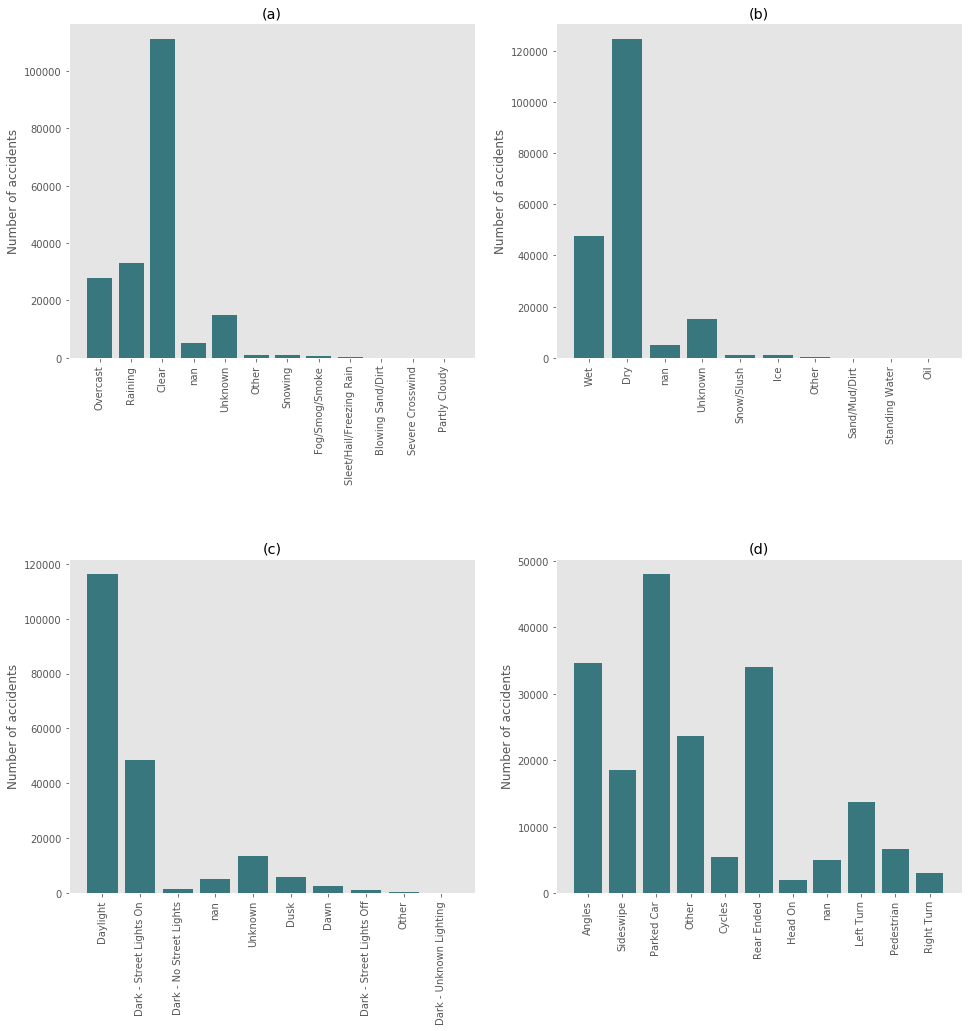

In [37]:
plt.rcParams["figure.figsize"]=(16,16)

plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)

In [38]:
data.dtypes

index               int64
SEVERITYCODE        int64
X                 float64
Y                 float64
SEVERITYCODE.1      int64
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
SDOT_COLCODE        int64
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT       int64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
dtype: object

In [86]:
from sklearn.utils import resample
shuffled_data = data.sample(frac=1, random_state=4)

In [87]:
code_1 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 1]
code_2 = shuffled_data.loc[shuffled_data["SEVERITYCODE"] == 2]

In [88]:
resampled_df = pd.concat([code_1_resample, code_2_resample])

In [92]:
print(resampled_df.shape)

resampled_df.head(5)

(0, 22)


,index,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


In [93]:
for column in resampled_df.columns:
    print(column)

index
SEVERITYCODE
X
Y
SEVERITYCODE.1
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
SDOT_COLCODE
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR


([<matplotlib.axis.XTick at 0x7f76f2de4d30>,
 <a list of 2 Text xticklabel objects>)

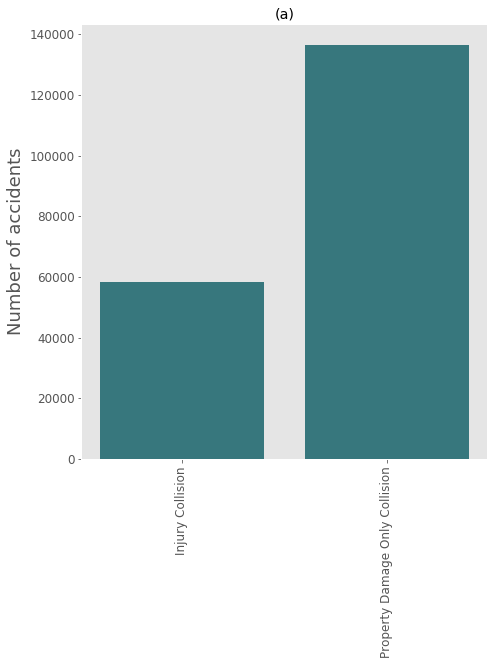

In [95]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')


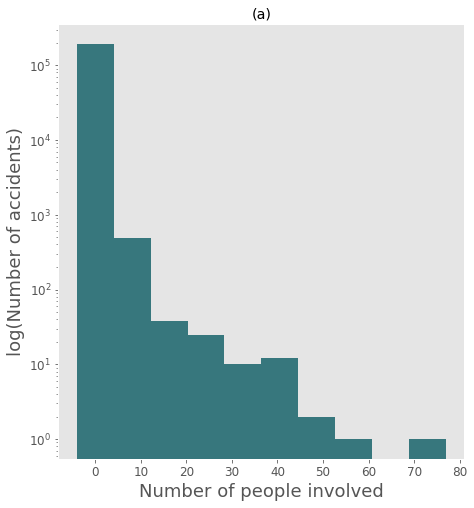

In [97]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of people involved", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='#37777D')
plt.yscale('log')


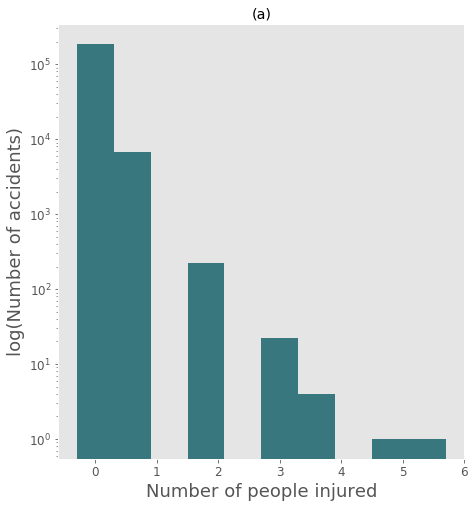

In [99]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["PEDCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of people injured", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["PEDCOUNT"], align='left', color='#37777D')
plt.yscale('log')

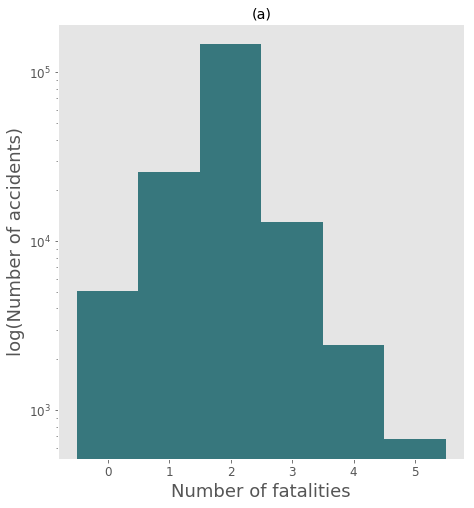

In [100]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["VEHCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.xlabel("Number of fatalities", size=18)
plt.ylabel("log(Number of accidents)", size=18)
plt.grid(b=None)
plt.hist(df["VEHCOUNT"], align='left', color='#37777D', bins=[0,1,2,3,4,5,6])
plt.yscale('log')

([<matplotlib.axis.XTick at 0x7f76ef675048>,
 <a list of 12 Text xticklabel objects>)

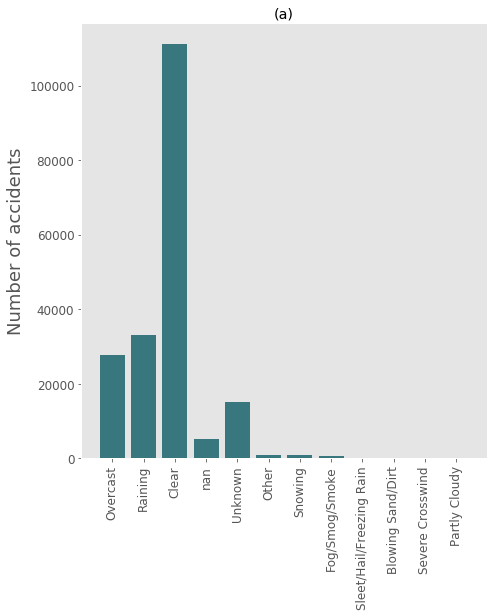

In [101]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')


([<matplotlib.axis.XTick at 0x7f76ef66ce10>,
 <a list of 10 Text xticklabel objects>)

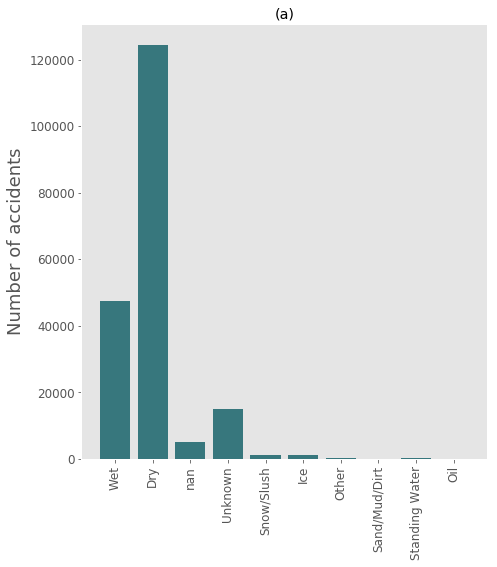

In [102]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

([<matplotlib.axis.XTick at 0x7f76f2fdf400>,
 <a list of 10 Text xticklabel objects>)

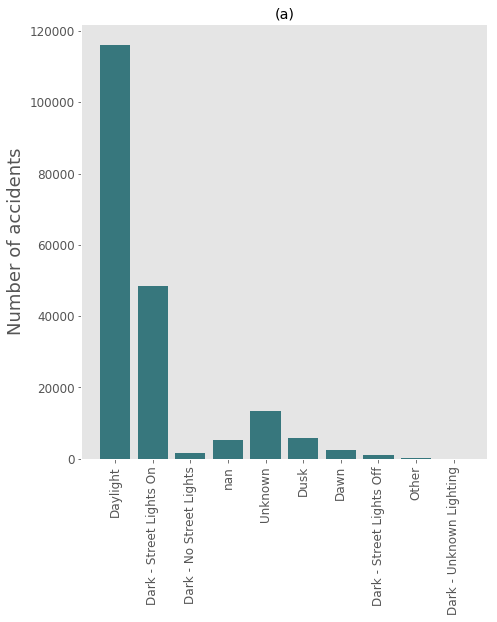

In [103]:
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

In [104]:
resampled_df.head(5)

,index,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


In [105]:
resampled_df.shape

(0, 22)

In [106]:
resampled_df.dtypes

index               int64
SEVERITYCODE        int64
X                 float64
Y                 float64
SEVERITYCODE.1      int64
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
SDOT_COLCODE        int64
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT       int64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR        int64
dtype: object

In [113]:
print("Column names:")
for (columnName, columnData) in resampled_df.iteritems():
    print(columnName)

Column names:
index
SEVERITYCODE
X
Y
SEVERITYCODE.1
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
SDOT_COLCODE
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR


In [117]:
Feature = resampled_df.drop(["SEVERITYCODE","PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "WEATHER", "ROADCOND", "LIGHTCOND", "SDOT_COLCODE", "INATTENTIONIND", "UNDERINFL",], axis=1)
Feature.head(5)


,index,X,Y,SEVERITYCODE.1,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


In [118]:
print(Feature.isnull().sum(axis=0))

index             0
X                 0
Y                 0
SEVERITYCODE.1    0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64


In [119]:
print("Shape of Feature dataframe:")
print(Feature.shape)

Shape of Feature dataframe:
(0, 11)
